You will collect 400 tweets from 2 different Twitter users, 200 from each.  You should try to find two users where you would expect there to be some noticeable differences in their tweets.

In [60]:
import tweepy
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
plt.style.use('seaborn')
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,9
sb.set_style('whitegrid')

def twitterCredential(Username,filename):
# Authenticate to Twitter
    customer_key = "cht3zkzkhKtCXadYO8a7fCa4E"
    customer_key_secret = "oN4KLrQOqYjKjJpS7b8C7kvKhNpCSrMOYT1vxjjciWmGGxGKmJ"
    access_token = "1300264439929663488-Vy4BHsechVLPxB48tksIfTMdt7S8Mr"
    access_token_secret = "BafJQS8QHxSK8v7NF5hSMS9PmrSmsCuM1ZSVSmoZ24uBu"
    
    auth = tweepy.OAuthHandler(customer_key, customer_key_secret)
    auth.set_access_token(access_token,access_token_secret)

# Create API object
    api = tweepy.API(auth)

    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    
    tweets = api.user_timeline(screen_name = Username,count = 200, lang = "en", tweet_mode = "extended")
    list_of_dicts = []
    for json_tweet in tweets:
        list_of_dicts.append(json_tweet._json)

    with open(filename,mode = 'w') as file:
         file.write(json.dumps(list_of_dicts,indent = 4))

In [181]:
twitterCredential('BillGates','200_Tweet_BillGates.json')
twitterCredential('Barackobama','200_barackobama.json')

Authentication OK
Authentication OK


**Q1:-** Use pandas to plot the posting times of the tweets for the two users; the aim of the plot is to distinguish the two users.

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

user1 = pd.read_json('200_Tweet_BillGates.json')
user2 = pd.read_json('200_barackobama.json')

In [184]:
def convert_to_hour(dataframe):
    dataframe['created_at'] = pd.to_datetime(dataframe['created_at'])
    dataframe['created_time'] = dataframe['created_at'].dt.hour

In [185]:
convert_to_hour(user1)
convert_to_hour(user2)

In [186]:
def Postingtime(user):
    user_total = user.groupby('created_time').size().to_frame()
    user1_final = user_total.reset_index()
    user1_final.columns = ['created_time','No of Tweets']
    return user1_final

In [187]:
User1_df = Postingtime(user1)
User2_df = Postingtime(user2)

In [188]:
def Postingtime_Merge():
    Mergedata = pd.merge(User1_df,User2_df, how = 'outer',left_on = 'created_time',right_on = 'created_time')
    Mergedata.sort_values(by = 'created_time',inplace = True)
    Finaldata = Mergedata.fillna(0)
    return Finaldata

In [189]:
FinalDf = Postingtime_Merge()
FinalDf.head()

,created_time,No of Tweets_x,No of Tweets_y
0,0,8.0,7.0
1,1,6.0,2.0
2,2,4.0,1.0
3,3,5.0,5.0
4,4,5.0,1.0


In [190]:
def plot_posting_time(df):
    plt.plot('created_time','No of Tweets_x',data = df,label = 'Bill Gates')
    plt.plot('created_time','No of Tweets_y',data = df,label = 'Barack obama',color = 'red')
    plt.legend()
    plt.xlabel('No of hours',fontsize=14)
    plt.ylabel('No of tweets',fontsize=14)
    plt.title("Posting time of the tweets",fontsize=14, fontweight='bold')
    plt.show()

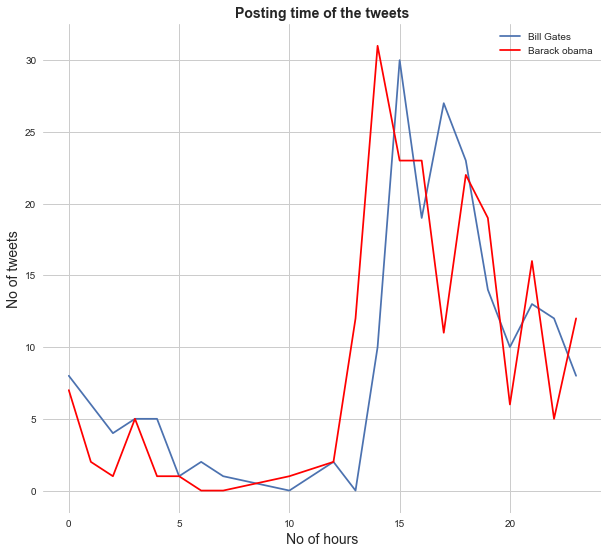

In [191]:
plot_posting_time(FinalDf)

**Interpretation:-** Billing Gates and Barack obama posting time looks consistent. However, Bracker obama tweets is more in compare to Bill Gates between 10 AM to 3 PM.

**Q2:-** Use pandas to construct a bar chart of the proportions of tweets for each of the two users that contain pictures or links.

In [289]:
import json

def extract_picture_link_JSON(filename,user):
    list_of_data = []
    entities=[]

    with open(filename,mode = 'r',encoding = "utf-8") as file:
        list_of_data = json.load(file)
        for tweet in list_of_data:
             if (len(tweet['entities']['urls'])) <=1:
                    entities.append(tweet['entities'])

    link = []
    source = []
    for tags in entities:
        if not tags['urls']:
            link.append(tags['urls'])    
        else:
            for urls in tags['urls']:
                link.append(urls['url'])
    
    pictures = []
    for r in entities:
         pictures.append(r.get('media'))
    finalPic = []
    for picture in pictures:
        if picture != None:
            for pic in picture:
                finalPic.append(pic['media_url'])
                source.append(user)
        else:
            finalPic.append('')
            source.append(user)
    Finaldf = pd.DataFrame({'Link':link,'Picture':finalPic,'Source':user})
    return Finaldf

In [291]:
df_user1 = extract_picture_link_JSON('200_Tweet_BillGates.json','Bill Gates')
df_user2 = extract_picture_link_JSON('200_barackobama.json','Barack obama')

In [294]:
def clean_mergeuser():
    Mergeuser = pd.concat([df_user1,df_user2])
    Mergeuser['Link'] = Mergeuser['Link'].astype(str).replace('[]',' ')
    MergeuserFinal = Mergeuser.replace(r'^\s*$', np.nan, regex=True)
    MergeuserFinal['Status'] = np.where(MergeuserFinal.Link.notnull() | MergeuserFinal.Picture.notnull(), 'Picture/link', 'No Picture/link')
    return MergeuserFinal

In [295]:
Mergeddf = clean_mergeuser()
Mergeddf

,Link,Picture,Source,Status
0,https://t.co/F2pQiIYqry,NaN,Bill Gates,Picture/link
1,https://t.co/ZadPiUS73z,NaN,Bill Gates,Picture/link
2,https://t.co/CzFHuwdPcS,NaN,Bill Gates,Picture/link
3,https://t.co/xA0rjh8xBk,NaN,Bill Gates,Picture/link
4,https://t.co/XFTYVZ2C2N,http://pbs.twimg.com/media/EjBVzcaUcAAmzw_.jpg,Bill Gates,Picture/link
...,...,...,...,...
189,https://t.co/7cy71sKLVG,NaN,Barack obama,Picture/link
190,NaN,http://pbs.twimg.com/media/ETzOTIUWkAEVhHv.jpg,Barack obama,Picture/link
191,NaN,NaN,Barack obama,No Picture/link
192,https://t.co/aBAuBoMYFm,NaN,Barack obama,Picture/link


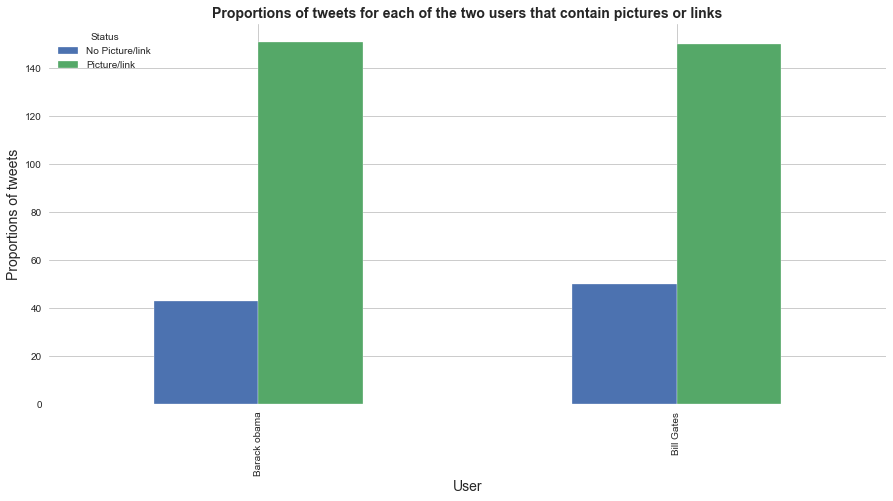

In [459]:
def plot_bar():
    fig, ax = plt.subplots(figsize=(15,7))
    Mergeddf.groupby(['Source','Status']).size().unstack().plot.bar(ax=ax)
    plt.xlabel('User',fontsize=14)
    plt.ylabel('Proportions of tweets',fontsize=14)
    plt.title("Proportions of tweets for each of the two users that contain pictures or links",fontsize=14, fontweight='bold')
    plt.show()
plot_bar()

**Interpretation:-** Bill Gates uses more Picture and Links to convey information than Elon Musk

**Q3:-** Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.

In [305]:
def extract_hashtags_JSON(filename,user):
    entities=[]
    source = []
    with open(filename,mode = 'r',encoding = "utf-8") as file:
        list_of_data = json.load(file)
        for tweet in list_of_data:
            entities.append(tweet['entities'])
    textdata = []
    for hashtags in entities:
        if not hashtags['hashtags']:
            textdata.append(hashtags['hashtags'])
            source.append(user)
        else:
             for data in hashtags['hashtags']:
                textdata.append(data['text'])
                source.append(user)
        finalhashtag = pd.DataFrame({'Source':source,'Hashtag':textdata})
    return finalhashtag

In [307]:
df_hashtag1 = extract_hashtags_JSON('200_Tweet_BillGates.json','Bill Gates')
df_hashtag2 = extract_hashtags_JSON('200_barackobama.json','Barack obama')

In [310]:
def clean_merge():
    Mergetags = pd.concat([df_hashtag1,df_hashtag2])
    Mergetags['Hashtag'] = Mergetags['Hashtag'].astype(str).replace('[]',' ')
    MergeFinal = Mergetags.replace(r'^\s*$', np.nan, regex=True)
    return MergeFinal

In [326]:
hashtag = clean_merge()
hashtag['Hashtag'] = hashtag['Hashtag'].fillna('No Hashtag')
hashtag

,Source,Hashtag
0,Bill Gates,No Hashtag
1,Bill Gates,No Hashtag
2,Bill Gates,No Hashtag
3,Bill Gates,No Hashtag
4,Bill Gates,No Hashtag
...,...,...
196,Barack obama,No Hashtag
197,Barack obama,No Hashtag
198,Barack obama,No Hashtag
199,Barack obama,No Hashtag


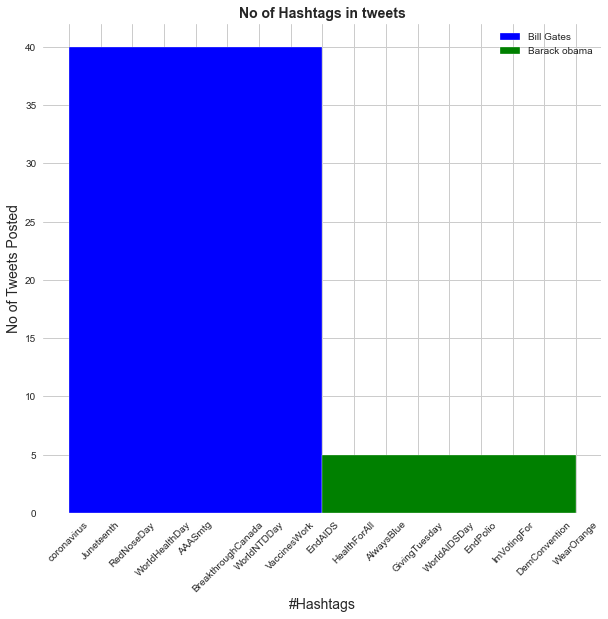

In [340]:
def plot_historgram():
    filter1 = hashtag[(hashtag["Source"]=="Bill Gates") & (hashtag['Hashtag']!= 'No Hashtag')]
    filter2 = hashtag[(hashtag["Source"]=="Barack obama") & (hashtag['Hashtag']!= 'No Hashtag')]
    x = [Hashtag for Hashtag in filter1['Hashtag']]
    y = [Hashtag for Hashtag in filter2['Hashtag']]
    colors = ['b','g']
    bins = 1
    fig, ax1 = plt.subplots()
    ax1.hist([x,y],bins,color=colors, label=['Bill Gates','Barack obama'])
    plt.legend()
    loc='upper right'
    plt.xlabel('#Hashtags',fontsize=14)
    plt.ylabel('No of Tweets Posted',fontsize=14)
    plt.title("No of Hashtags in tweets",fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()
plot_historgram()

**Q4:** Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

In [356]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
import collections
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AjitC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AjitC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [369]:
user1['Source'] = 'Bill Gates'
user2['Source'] = 'Barack obama'
user1data = user1[['full_text','Source']]
user2data = user2[['full_text','Source']]
MergeUsers = pd.concat([user1data,user2data])
MergeUsers

,full_text,Source
0,For the last years Dr Firdausi Qadri an ...,Bill Gates
1,I m excited to see this kind of innovation De...,Bill Gates
2,The only way to eliminate the threat of COVID ...,Bill Gates
3,Understanding this ncept can help us measure ...,Bill Gates
4,Developing and manufacturing vaccines won t en...,Bill Gates
...,...,...
195,Here’s a useful summary of the current best th...,Barack obama
196,"Ten years ago today, I signed the Affordable C...",Barack obama
197,Sometimes it takes the wisdom and resilience o...,Barack obama
198,"And @cripchick, a disabled activist, understan...",Barack obama


In [370]:
import re
def cleanTxt(text):
     text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
     text = re.sub('#', '', text) # Removing '#' hash tag
     text =  re.sub(':', '', text) # Removing '#' hash tag
     text = re.sub('[^a-zA-Z]',' ',text) # Removing '#' hash tag
     text = re.sub('https',' ',text) # Removing '#' hash tag
     text = re.sub('co',' ',text) # Removing '#' hash tag
     text = re.sub('RT[\s]+', '', text) # Removing RT
     text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
     return text

MergeUsers['full_text'] = MergeUsers['full_text'].apply(cleanTxt)

In [405]:
import math 
def calculate_odds_ratio(User):
    BillGates = MergeUsers[MergeUsers['Source'] == User]
    cleaned_tweet = BillGates['full_text'].values 
    words_in_tweet = [tweet.lower().split() for tweet in cleaned_tweet]
    words_in_tweet[0]
    stop_words = set(stopwords.words('english'))
    for all_words in words_in_tweet:
        for word in all_words:
            tweets_nsw = [[word for word in tweet_words if not word in stop_words] for tweet_words in words_in_tweet]

    all_words_nsw = list(itertools.chain(*tweets_nsw))
    counts_nsw = collections.Counter(all_words_nsw)
    counts_nsw.most_common(20)
    clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(20),
                             columns=['words', 'count'])
    x=0
    dic1 = {}
    for i in counts_nsw:
        x = x + counts_nsw[i]
    total = x
    ratio = []
    for i in counts_nsw:
    #print(i)
        ratio= (counts_nsw[i]+1)/(total+1)
        dic1[i] = ratio
    dfdata = pd.DataFrame(list(dic1.items()),columns = ['words','odds ratio'])
    mergedata = pd.merge(clean_tweets_nsw,dfdata,how = 'inner', left_on = 'words',right_on = 'words')
    return mergedata

In [629]:
BillGates = calculate_odds_ratio('Bill Gates')
Barack = calculate_odds_ratio('Barack obama')

In [630]:
BillGates['Source'] = 'Bill Gates'
Barack['Source'] = 'Barack Obama'
Mergedata = pd.merge(BillGates,Barack, how = 'inner',left_on = 'words',right_on = 'words')
Mergedata['log odd ratios'] = np.log2(Mergedata['odds ratio_x']/Mergedata['odds ratio_y'])
BillGates['log odd ratios'] =  np.log2(BillGates['odds ratio'])
Barack['log odd ratios'] = np.log2(1/Barack['odds ratio'])
Mergedata['log odd ratios'] = np.log2(Mergedata['odds ratio_x']/Mergedata['odds ratio_y'])
Mergedata1 = Mergedata.copy()
Mergedata1['log odd ratios'] = np.log2(Mergedata1['odds ratio_y']/Mergedata1['odds ratio_x'])
BillGates['log odd ratios'] =  np.log2(BillGates['odds ratio'])
Barack['log odd ratios'] = np.log2(1/Barack['odds ratio'])

In [632]:
BillGatesdata = BillGates.loc[~BillGates['words'].isin(Mergedata['words'])]
Barackdata = Barack.loc[~Barack['words'].isin(Mergedata['words'])]
Mergedata1

,words,count_x,odds ratio_x,Source_x,count_y,odds ratio_y,Source_y,log odd ratios
0,us,22,0.006872,Bill Gates,44,0.011480,Barack Obama,0.740306
1,people,20,0.006274,Bill Gates,28,0.007398,Barack Obama,0.237678
2,one,19,0.005976,Bill Gates,25,0.006633,Barack Obama,0.150527
3,like,16,0.005079,Bill Gates,21,0.005612,Barack Obama,0.143984
4,get,16,0.005079,Bill Gates,28,0.007398,Barack Obama,0.542533
5,today,15,0.004780,Bill Gates,23,0.006122,Barack Obama,0.356977


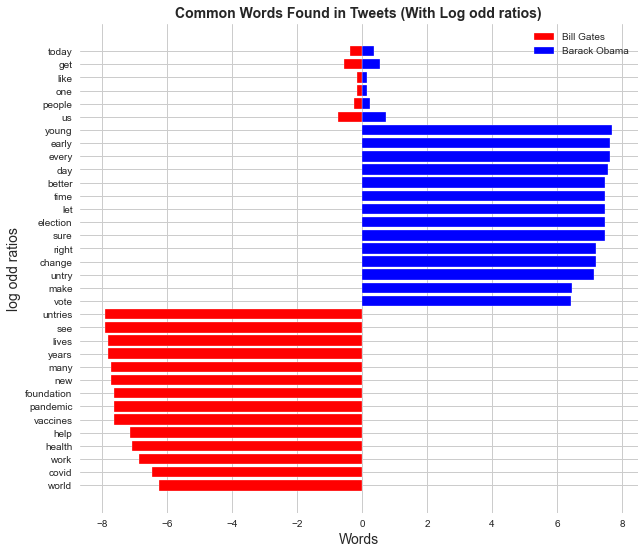

In [636]:
ax = plt.subplot(111)
ax.barh(BillGatesdata['words'], BillGatesdata['log odd ratios'], color='r',label = 'Bill Gates')
ax.barh(Barackdata['words'], Barackdata['log odd ratios'],label = 'Barack Obama', color='b')
ax.barh(Mergedata1['words'], Mergedata1['log odd ratios'], color='b')
ax.barh(Mergedata['words'], Mergedata['log odd ratios'], color='r')
ax.set_title("Common Words Found in Tweets (With Log odd ratios)",fontweight='bold',fontsize=14)
plt.xlabel('Words',fontsize=14)
plt.ylabel('log odd ratios',fontsize=14)
plt.legend()
plt.show()

**Q5:** Use the nltk vader module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.

In [637]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
dic = []
tweetdata = []
user = []
analyzer = SentimentIntensityAnalyzer()
for tweet,Source in zip(MergeUsers['full_text'],MergeUsers['Source']):
        vs = analyzer.polarity_scores(tweet)
        dic.append(vs)
        tweetdata.append(tweet)
        user.append(Source)

In [638]:
data = pd.DataFrame(dic,tweetdata)
finaldata = data.reset_index()
finaldata.columns = ['text','Negative','Neutral','Positive','Compound']
finaldata['Source'] = user
finaldata

,text,Negative,Neutral,Positive,Compound,Source
0,For the last years Dr Firdausi Qadri an ...,0.000,0.912,0.088,0.3818,Bill Gates
1,I m excited to see this kind of innovation De...,0.130,0.689,0.180,0.3197,Bill Gates
2,The only way to eliminate the threat of COVID ...,0.246,0.617,0.136,-0.7950,Bill Gates
3,Understanding this ncept can help us measure ...,0.000,0.800,0.200,0.6705,Bill Gates
4,Developing and manufacturing vaccines won t en...,0.053,0.860,0.086,0.3400,Bill Gates
...,...,...,...,...,...,...
395,Here s a useful summary of the current best th...,0.069,0.743,0.188,0.6705,Barack obama
396,Ten years ago today I signed the Affordable C...,0.086,0.737,0.177,0.7227,Barack obama
397,Sometimes it takes the wisdom and resilience o...,0.000,0.803,0.197,0.7096,Barack obama
398,And a disabled activist understands what it...,0.065,0.726,0.210,0.5574,Barack obama


In [639]:
Finalgroup = finaldata.groupby(['Source','text'])['Compound'].mean().to_frame()
CompoundAverage = Finalgroup.reset_index()
CompoundAverage.columns = ['Source','text', 'Average Compound']
CompoundAverage

,Source,text,Average Compound
0,Barack obama,So if we want to bring about real change t...,0.2177
1,Barack obama,The more specific we can make demands for c...,-0.2263
2,Barack obama,The point of protest is to raise public awa...,-0.4310
3,Barack obama,The protests represent a genuine and legiti...,-0.7650
4,Barack obama,To do that we have to know which levels of...,0.1406
...,...,...,...
395,Bill Gates,When will America be able to get back to work ...,0.0000
396,Bill Gates,Work is going full speed on potential treatmen...,0.8402
397,Bill Gates,You uld find wild poliovirus in untries ...,0.0000
398,Bill Gates,org We all have an obligation a mission and...,0.0000
